# Analyzing Employee Exit Surveys

In this project we will analyze exit surveys from employees of the [Department of Education, Training, and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute. 

We will atempt to answer the following questions: 
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older emplyoees? 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [2]:
# Let's start by reading the csv files into dataframes
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
# Now lets take a look at the format of each table
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
# Do the same for TAFE
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
# Now let's take a slightly more detailed look at the sets
print(dete_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [6]:
print(tafe_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

## Initial Observations
We can observe the following from the information above
- The dete_survey has already added missing information in the form of a string containing the phrase "Not Stated," but this will cause problems since it is non NaN
- Both surveys have superfluous information not needed for our analysis
- Many of the columns contain the same information but with different names
- Many of the columns in dete_survey have around 822 rows of information, but some contain only 16

Now we will read the datasets into dataframes again, but this time we will replace the "Not Stated" values with NaN. Additionally, we will drop extra columns that are not necessary to our analysis.

In [7]:
# Creates NaN for each instance of "Not Stated" 
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [8]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

## Renaming Columns
Both of the datasets contain the same information under columns with different names, respectively. We will now standardize the naming convention for each of the columns to make our code more readable and easier to work with.

In [9]:
"""
We will update the column names by force lower, removing trailing spaces, and replacing spaces with underscores
"""
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [10]:
map_rename = {
    'Record ID' : 'id',
    'CESSATION YEAR' : 'cease_date',
    'Reason for ceasing employment' : 'separationtype',
    'Gender. What is your Gender?' : 'gender',
    'CurrentAge. Current Age' : 'age',
    'Employment Type. Employment Type' : 'employment_status',
    'Classification. Classification' : 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)' : 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)' : 'role_service'
}

tafe_survey_updated = tafe_survey_updated.rename(mapper=map_rename, axis=1)
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


## Filter the Data
For this project, we only need to analyze survey respondents who resigned, so we will only select the separation type containing "Resignation." 

In [11]:
# Let's look at the different types of separation
print(dete_survey_updated['separationtype'].value_counts())
print('-------------------------------------------------------------------')
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
-------------------------------------------------------------------
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [12]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
print(dete_survey_updated['separationtype'].value_counts())

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64


In [13]:
# Now we will copy only resignations over
# copy() is used to avoid the SettingWithCopy Warning
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

# print(dete_resignations.head())
# print(tafe_resignations.head())

## Verify the Data
Next we will check the `cease_date` and `date_resignations` columns to make sure all of the years are valid. We'll check their validity according to the following: 
- `dete_start_date` must not come before `cease_date` 
- `dete_start_date` will likely not be before 1940 since most people in the field enter around their 20s. 

In [14]:
# Check unique values 
print(dete_resignations['cease_date'].value_counts())

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2006      1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64


In [15]:
# We need to ignore the months
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')

print(dete_resignations['cease_date'].value_counts())

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


In [16]:
print(dete_resignations['dete_start_date'].value_counts().sort_index())

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64


In [17]:
print(tafe_resignations['cease_date'].value_counts())

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64


## Findings
The years in both dataframes don't completely align. The `tafe_survey_updated` dataframe contains some cease dates in 2009, but the `dete_survey_updated` dataframe does not. The `tafe_survey_updated` dataframe also contains many more cease dates in 2010 than the dete_survey_updaed dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.

## Create a New Column
Since our end goal is to answer the question below, we need a column containing the length of time an employee spent in their workplace, or years of service, in both dataframes.

End goal: Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
The `tafe_resignations` dataframe already contains a "service" column, which we renamed to `institute_service`.

Below, we calculate the years of service in the dete_survey_updated dataframe by subtracting the `dete_start_date` from the `cease_date` and create a new column named `institute_service`.

In [18]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

# check results
print(dete_resignations['institute_service'].head())

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64


## Locate Dissatisfied Employees

We will categorize dissatisfied employees based on the information provided in the following columns: 

From `tafe_survey_updated`
- `Contributing Factors. Dissatisfaction`
- `Contributing Factors. Job Dissatisfaction`


From `dete_survey_updated`
- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

If any of these factors above caused the resignation, we will mark the row as `dissatisfied` in a new column. The new column will contain: 

- `True`: indicating that a person resigned because they were dissatisfied
- `False`: indicates a person resigned for other reasons
- `NaN`: value is missing 

In [19]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print('-----------------------------------------------------------------')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-----------------------------------------------------------------
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [20]:
def update_vals(val): 
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Dissatisfaction']].applymap(update_vals).any(1, skipna=False)

In [21]:
# check values after update 
tafe_resignations_up = tafe_resignations.copy()
print(tafe_resignations['dissatisfied'].head())
print(tafe_resignations['dissatisfied'].value_counts(dropna=False))

3    False
4    False
5    False
6    False
7    False
Name: dissatisfied, dtype: object
False    277
True      55
NaN        8
Name: dissatisfied, dtype: int64


In [22]:
# Update the values in dete_resignations
dete_resignations['dissatisfied'] = dete_resignations[[
    'job_dissatisfaction', 'dissatisfaction_with_the_department',
    'physical_work_environment', 'lack_of_recognition',
    'lack_of_job_security', 'work_location',
    'employment_conditions', 'work_life_balance', 'workload'
]].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the Data
We will now add an institute column to differentiate between the two combined datasets. Then we will drop any columns that we don't need. 

In [23]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

# print(dete_resignations_up.head())

In [24]:
# lets combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# verify the concatenation
print(combined.notnull().sum().sort_values())

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [25]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

## Modifying the Service Column
Now, we will clean the `institute_service` column and categorize the employees based on the following definitions: 

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [26]:
# Showcase the different values 
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [27]:
# Now lets fix it 
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check validity of transformations
combined_updated['institute_service_up'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [28]:
# Now we will convert the years of service to categories from our criteria
def transform_service(val):
    if val >= 11:
        return 'Veteran'
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    else:
        return "New"
    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Check the update once again
print(combined_updated['service_cat'].value_counts())

New            281
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64


## Rudimentary Analysis
First, we will handle some of the missing data in the `dissatisfied` column. Then, we will calculate the percentage of dissatisfied employees in each `service_cat` group. 

In [29]:
# Display the values again
combined_updated['dissatisfied'].value_counts(dropna=False)

False    439
True     204
NaN        8
Name: dissatisfied, dtype: int64

In [30]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

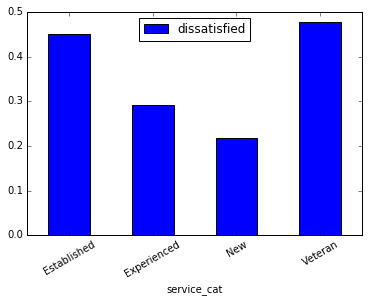

In [31]:
# Calculate the percentage of dissatisfied employees in each service_cat group
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

#Plot the results
dis_pct.plot(kind='bar', rot=30)

We can easily conclude that employees with 7 or more years of service tend to resign from their job due to some sort of dissatisfaction with the job than employees with less experience. However, this is a rather naive analysis considering the handling of missing data.